In [1]:
# set up reading in data
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

filepath = '../data/matches.csv'
matches = pd.read_csv(filepath)

In [2]:
# here's what our data looks like
print('shape:', matches.shape)
matches.head()

shape: (3804, 196)


,match_id,competition_id,season_id,date,home_team_name,away_team_name,score_home,score_away,half_score_home,half_score_away,...,home_six_yard_block,home_successful_final_third_passes,home_total_attacking_pass,home_total_fwd_zone_pass,home_total_offside,home_was_fouled,home_won_contest,home_won_corners,home_won_tackle,home_yellow_card
0,699451,87,2013,1379960100,FC St. Pauli,Fortuna Düsseldorf,1,1,NaN,NaN,...,0,63,0,248,1,20,23,7,9,2
1,699453,87,2013,1379849400,SG Dynamo Dresden,SC Paderborn 07,2,2,NaN,NaN,...,0,65,0,212,1,12,22,5,17,2
2,699496,87,2013,1383327000,VfR Aalen,Fortuna Düsseldorf,1,0,NaN,NaN,...,0,45,0,198,5,17,21,3,27,2
3,699537,87,2013,1386955800,1. FC Kaiserslautern,SC Paderborn 07,0,1,NaN,NaN,...,0,98,0,383,3,13,17,6,16,4
4,699624,87,2013,1395765000,SC Paderborn 07,FC St. Pauli,3,0,NaN,NaN,...,1,87,0,225,3,20,11,8,16,3


In [3]:
# get rsl's matches
team = 'Real Salt Lake'
rsl_matches = matches[(matches.home_team_name == team) | (matches.away_team_name == team)]
rsl_matches.head()

,match_id,competition_id,season_id,date,home_team_name,away_team_name,score_home,score_away,half_score_home,half_score_away,...,home_six_yard_block,home_successful_final_third_passes,home_total_attacking_pass,home_total_fwd_zone_pass,home_total_offside,home_was_fouled,home_won_contest,home_won_corners,home_won_tackle,home_yellow_card
10,732283,98,2013,1383530400,LA Galaxy,Real Salt Lake,1,0,NaN,NaN,...,1,104,0,332,1,10,2,10,14,2
11,732427,98,2013,1383876000,Real Salt Lake,LA Galaxy,2,0,NaN,NaN,...,0,80,0,330,5,13,3,9,16,2
19,732711,98,2013,1384135200,Real Salt Lake,Portland Timbers,4,2,NaN,NaN,...,0,83,0,255,0,12,5,7,15,0
20,732712,98,2013,1385344800,Portland Timbers,Real Salt Lake,0,1,NaN,NaN,...,0,115,0,317,3,17,4,9,24,1
21,733006,98,2013,1386450000,Sporting Kansas City,Real Salt Lake,1,1,NaN,NaN,...,0,86,0,335,4,20,7,9,21,2


In [4]:
# what years do we have?
rsl_matches.season_id.unique()

array([2013, 2014, 2015, 2016, 2017])

In [5]:
# get just this year
rsl_matches_17 = rsl_matches[rsl_matches.season_id == 2017]
rsl_matches_17.head()

,match_id,competition_id,season_id,date,home_team_name,away_team_name,score_home,score_away,half_score_home,half_score_away,...,home_six_yard_block,home_successful_final_third_passes,home_total_attacking_pass,home_total_fwd_zone_pass,home_total_offside,home_was_fouled,home_won_contest,home_won_corners,home_won_tackle,home_yellow_card
2852,900875,98,2017,1488663000,Real Salt Lake,Toronto FC,0,0,0.0,0.0,...,1,77,0,259,1,14,6,6,14,3
2860,900883,98,2017,1489258800,Chicago Fire,Real Salt Lake,2,0,2.0,0.0,...,0,69,0,215,1,15,7,4,15,0
2896,902139,98,2017,1489887000,Real Salt Lake,LA Galaxy,1,2,1.0,0.0,...,0,49,0,196,4,15,3,5,11,3
2900,902143,98,2017,1490472000,New York Red Bulls,Real Salt Lake,0,0,0.0,0.0,...,1,72,0,268,4,15,10,8,24,1
2906,902150,98,2017,1491091200,Minnesota United FC,Real Salt Lake,4,2,1.0,1.0,...,0,56,0,261,3,14,6,6,15,2


In [6]:
# how many games do we have? do the goals match up? 
# looks like we have rsl's mls games through sep. 16
print('shape', rsl_matches_17.shape)
rsl_matches_17_home = rsl_matches_17[rsl_matches_17.home_team_name == team]
rsl_matches_17_away = rsl_matches_17[rsl_matches_17.away_team_name == team]
print('goals for', rsl_matches_17_home.sum().score_home + rsl_matches_17_away.sum().score_away)
print('goals against', rsl_matches_17_home.sum().score_away + rsl_matches_17_away.sum().score_home)

shape (30, 196)
goals for 44
goals against 52


In [7]:
# let's look at our columns for interesting stuff...
# score_x, x_aerial_won, x_successful_final_third_passes
list(rsl_matches_17.columns)

['match_id',
 'competition_id',
 'season_id',
 'date',
 'home_team_name',
 'away_team_name',
 'score_home',
 'score_away',
 'half_score_home',
 'half_score_away',
 'away_equalizer_goal',
 'away_matchwinner_goal',
 'away_outofplayconceded_f24',
 'away_savesbody_f24',
 'away_savescaught_f24',
 'away_savescollected_f24',
 'away_savesdiving_f24',
 'away_savesfeet_f24',
 'away_savesfingertip_f24',
 'away_saveshands_f24',
 'away_savesparrieddanger_f24',
 'away_savesparriedsafe_f24',
 'away_savesreaching_f24',
 'away_savesstanding_f24',
 'away_savesstooping_f24',
 'away_shotsclearedofflineinsidebox_f24',
 'away_shotsclearedofflineoutsidebox_f24',
 'away_accurate_back_zone_pass',
 'away_accurate_corners_intobox',
 'away_accurate_cross',
 'away_accurate_keeper_throws',
 'away_accurate_through_ball',
 'away_aerial_lost',
 'away_aerial_won',
 'away_att_hd_goal',
 'away_att_hd_off_target',
 'away_att_hd_target',
 'away_att_ibox_blocked',
 'away_att_ibox_goal',
 'away_att_ibox_off_target',
 'away_a

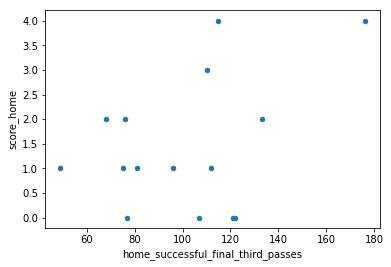

In [8]:
rsl_matches_17_home.plot(x='home_successful_final_third_passes', y='score_home', kind='scatter')

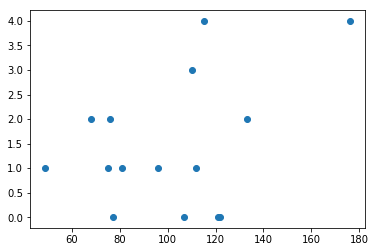

In [9]:
# does number of successful passes in the final third influence how much RSL scores?
plt.scatter(rsl_matches_17_home.home_successful_final_third_passes, 
         rsl_matches_17_home.score_home)
# plt.scatter(rsl_matches_17_away.away_successful_final_third_passes, 
#          rsl_matches_17_away.score_away)
plt.show()

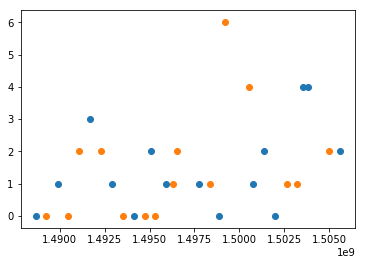

In [10]:
plt.scatter(rsl_matches_17_home.date, 
         rsl_matches_17_home.score_home)
plt.scatter(rsl_matches_17_away.date, 
         rsl_matches_17_away.score_away)
plt.show()

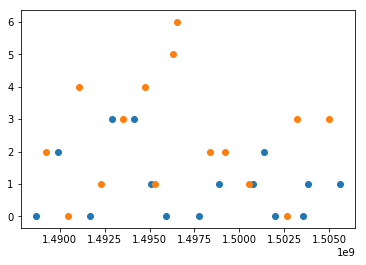

In [11]:
plt.scatter(rsl_matches_17_home.date, 
         rsl_matches_17_home.score_away)
plt.scatter(rsl_matches_17_away.date, 
         rsl_matches_17_away.score_home)
plt.show()

In [12]:
# what are the most correleated stats with scoring goals?
# besides directly related stuff, keeper and aerial saves were suprisingly correlated
with pd.option_context('display.max_rows', 200):
    print(matches.corr().score_home)

match_id                                 -0.018515
competition_id                            0.010669
season_id                                 0.018627
date                                     -0.008998
score_home                                1.000000
score_away                               -0.007807
half_score_home                           0.697686
half_score_away                          -0.014827
away_equalizer_goal                      -0.023249
away_matchwinner_goal                    -0.209569
away_outofplayconceded_f24               -0.044181
away_savesbody_f24                        0.032857
away_savescaught_f24                     -0.009510
away_savescollected_f24                  -0.000564
away_savesdiving_f24                      0.114469
away_savesfeet_f24                        0.100100
away_savesfingertip_f24                   0.007689
away_saveshands_f24                       0.081409
away_savesparrieddanger_f24               0.137817
away_savesparriedsafe_f24      

In [17]:
matches[matches.date > 1379960100].shape

(3794, 196)

In [3]:
import sys
import os
sys.path.append(os.path.abspath('..'))
# from extraction import get_teams_matches
# from extraction import get_teams_season_past_matches
from extraction import aggregate_data as agg

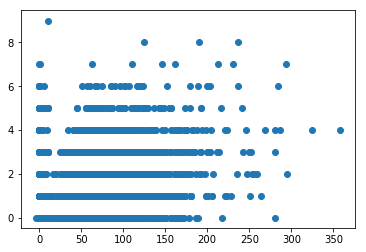

In [25]:
all_matches = agg.get_matches(filepath)
plt.scatter(all_matches.home_successful_final_third_passes, 
         all_matches.score_home)

In [27]:
all_matches.sum()

match_id                                                                         3297088462
competition_id                                                                       293091
season_id                                                                           7664598
date                                                                          5612213956740
home_team_name                            FC St. PauliSG Dynamo DresdenVfR Aalen1. FC Ka...
away_team_name                            Fortuna DüsseldorfSC Paderborn 07Fortuna Düsse...
score_home                                                                             6068
score_away                                                                             4773
half_score_home                                                                        2413
half_score_away                                                                        1833
away_equalizer_goal                                                             

In [40]:
from datetime import datetime
print(str(datetime.now()))
natee = 0
for i, match in agg.get_matches(filepath).iterrows():
    home_past_matches = agg.get_teams_season_past_matches(filepath, match.home_team_name, match.season_id, match.date)
    away_past_matches = agg.get_teams_season_past_matches(filepath, match.away_team_name, match.season_id, match.date)
    if home_past_matches.shape[0] > 0 and away_past_matches.shape[0] > 0:
        if natee % 100 == 0:
            print(natee)
        natee += 1
#         sum_home_past_matches = home_past_matches.sum()
        break
print(natee)
print(str(datetime.now()))

2017-10-19 09:10:35.296187
0
1
2017-10-19 09:10:36.250654


,match_id,competition_id,season_id,date,home_team_name,away_team_name,score_home,score_away,half_score_home,half_score_away,...,home_six_yard_block,home_successful_final_third_passes,home_total_attacking_pass,home_total_fwd_zone_pass,home_total_offside,home_was_fouled,home_won_contest,home_won_corners,home_won_tackle,home_yellow_card
1,699453,87,2013,1379849400,SG Dynamo Dresden,SC Paderborn 07,2,2,NaN,NaN,...,0,65,0,212,1,12,22,5,17,2
3,699537,87,2013,1386955800,1. FC Kaiserslautern,SC Paderborn 07,0,1,NaN,NaN,...,0,98,0,383,3,13,17,6,16,4


In [60]:
home_home_past_matches = home_past_matches[home_past_matches['home_team_name'] == match.home_team_name]
home_home_past_matches.drop('home_team_name')
home_home_past_matches.drop('home_team_name')
if home_home_past_matches.shape[0] > 0:
    avg_home_home_past_matches = home_home_past_matches.sum() / home_home_past_matches.shape[0]
else:
    avg_home_home_past_matches = home_home_past_matches.sum()
# print(avg_home_home_past_matches)

match_id                                  0.0
competition_id                            0.0
season_id                                 0.0
date                                      0.0
home_team_name                            0.0
away_team_name                            0.0
score_home                                0.0
score_away                                0.0
half_score_home                           0.0
half_score_away                           0.0
away_equalizer_goal                       0.0
away_matchwinner_goal                     0.0
away_outofplayconceded_f24                0.0
away_savesbody_f24                        0.0
away_savescaught_f24                      0.0
away_savescollected_f24                   0.0
away_savesdiving_f24                      0.0
away_savesfeet_f24                        0.0
away_savesfingertip_f24                   0.0
away_saveshands_f24                       0.0
away_savesparrieddanger_f24               0.0
away_savesparriedsafe_f24         

In [62]:
home_away_past_matches = home_past_matches[home_past_matches['away_team_name'] == match.home_team_name]
if home_away_past_matches.shape[0] > 0:
    avg_home_away_past_matches = home_away_past_matches.sum() #/ home_away_past_matches.shape[0]
else:
    avg_home_away_past_matches = home_away_past_matches.sum()
print(avg_home_home_past_matches)

match_id                                  0.0
competition_id                            0.0
season_id                                 0.0
date                                      0.0
home_team_name                            0.0
away_team_name                            0.0
score_home                                0.0
score_away                                0.0
half_score_home                           0.0
half_score_away                           0.0
away_equalizer_goal                       0.0
away_matchwinner_goal                     0.0
away_outofplayconceded_f24                0.0
away_savesbody_f24                        0.0
away_savescaught_f24                      0.0
away_savescollected_f24                   0.0
away_savesdiving_f24                      0.0
away_savesfeet_f24                        0.0
away_savesfingertip_f24                   0.0
away_saveshands_f24                       0.0
away_savesparrieddanger_f24               0.0
away_savesparriedsafe_f24         

In [152]:
matches = pd.read_csv(filepath)
home_team_matches = matches[matches.home_team_name == team]
home_team_matches = home_team_matches.drop('home_team_name', axis=1)
home_team_matches = home_team_matches.drop('away_team_name', axis=1)
home_team_matches = home_team_matches.drop('match_id', axis=1)
home_team_matches = home_team_matches.drop('competition_id', axis=1)
home_team_matches = home_team_matches.drop('season_id', axis=1)
home_team_matches = home_team_matches.drop('date', axis=1)
# home_clean_sheet_part is always 0...
# home_clean_sheet_away is always 0...
home_team_matches = home_team_matches.drop('home_clean_sheet_part', axis=1)
home_team_matches = home_team_matches.drop('home_clean_sheet_away', axis=1)
home_team_matches = home_team_matches.drop('away_clean_sheet_part', axis=1)
home_team_matches = home_team_matches.drop('away_clean_sheet_away', axis=1)
sum_home_team_matches = home_team_matches.sum()
num_home_matches = home_team_matches.shape[0]

away_team_matches = matches[matches.away_team_name == team]
away_team_matches = away_team_matches.drop('home_team_name', axis=1)
away_team_matches = away_team_matches.drop('away_team_name', axis=1)
away_team_matches = away_team_matches.drop('match_id', axis=1)
away_team_matches = away_team_matches.drop('competition_id', axis=1)
away_team_matches = away_team_matches.drop('season_id', axis=1)
away_team_matches = away_team_matches.drop('date', axis=1)
# home_clean_sheet_part is always 0...
# home_clean_sheet_away is always 0...
away_team_matches = away_team_matches.drop('home_clean_sheet_part', axis=1)
away_team_matches = away_team_matches.drop('home_clean_sheet_away', axis=1)
away_team_matches = away_team_matches.drop('away_clean_sheet_part', axis=1)
away_team_matches = away_team_matches.drop('away_clean_sheet_away', axis=1)
sum_away_team_matches = away_team_matches.sum()
num_away_matches = away_team_matches.shape[0]
num_matches = num_home_matches + num_away_matches

In [164]:
sum_home_team_matches = sum_home_team_matches.rename(lambda x: x.replace('home', 'KEEP'))
sum_away_team_matches = sum_away_team_matches.rename(lambda x: x.replace('away', 'KEEP'))
sum_team_matches = sum_home_team_matches + sum_away_team_matches
avg_team_matches = sum_team_matches / num_matches
for i, v in avg_team_matches.iteritems():
    if 'KEEP' not in i:
        try:
            avg_team_matches = avg_team_matches.drop(i)
        except ValueError:
            pass
for i, v in avg_team_matches.iteritems():
    if 'goal' in i or 'score' in i:
        print(i, v)

KEEP_att_hd_goal 0.206896551724
KEEP_att_ibox_goal 1.12643678161
KEEP_att_obox_goal 0.275862068966
KEEP_att_pen_goal 0.206896551724
KEEP_direct_goals 0.310344827586
KEEP_equalizer_goal 0.0459770114943
KEEP_error_lead_to_goal 0.103448275862
KEEP_goal_assist 0.954022988506
KEEP_goal_assist_openplay 0.793103448276
KEEP_goals_conceded_ibox 14.3103448276
KEEP_goals_conceded_obox 2.3908045977
KEEP_matchwinner_goal 0.172413793103
KEEP_own_goals 0.0
half_score_KEEP 0.32183908046
score_KEEP 1.36781609195


1.4022988505760001

In [167]:
matches = pd.read_csv(filepath)
matches.home_goals_conceded_ibox
# TODO: Divide some stats by 11 because they're given to all players on the field

0        0
1       22
2        0
3       11
4        0
5       11
6       11
7        0
8        0
9       11
10       0
11       0
12      11
13      22
14      22
15      22
16      22
17       0
18      11
19      11
20      11
21       0
22      11
23      11
24      31
25      44
26      22
27      22
28      11
29      11
        ..
3774    44
3775     0
3776     0
3777     0
3778     0
3779     0
3780     0
3781     0
3782     0
3783     0
3784     0
3785    11
3786     0
3787    11
3788     0
3789     0
3790    33
3791    22
3792    44
3793     0
3794     0
3795    55
3796     0
3797    11
3798    22
3799    11
3800    22
3801     0
3802     0
3803     0
Name: home_goals_conceded_ibox, Length: 3804, dtype: int64

In [218]:
matches = pd.read_csv(filepath)
matches = matches.drop('home_team_name', axis=1)
matches = matches.drop('away_team_name', axis=1)
matches = matches.drop('match_id', axis=1)
matches = matches.drop('competition_id', axis=1)
matches = matches.drop('season_id', axis=1)
matches = matches.drop('date', axis=1)
# home_clean_sheet_part is always 0...
# home_clean_sheet_away is always 0...
matches = matches.drop('home_clean_sheet_part', axis=1)
matches = matches.drop('home_clean_sheet_away', axis=1)
matches = matches.drop('away_clean_sheet_part', axis=1)
matches = matches.drop('away_clean_sheet_away', axis=1)
matches['home_won'] = matches.score_home > matches.score_away
matches['tie'] = matches.score_home == matches.score_away
matches['away_won'] = matches.score_home < matches.score_away
n = len(matches)
print('Home Win:', sum(matches['home_won']) / n)
print('Tie:', sum(matches['tie']) / n)
print('Away Win:', sum(matches['away_won']) / n)

Home Win: 0.45294426919
Tie: 0.265509989485
Away Win: 0.281545741325


In [224]:
# random_state is seed
train=matches.sample(frac=0.9, random_state=7).fillna(value=0)
test=matches.drop(train.index).fillna(value=0)

In [250]:
train_x = train.drop('home_won', axis=1)
train_x = train_x.drop('tie', axis=1)
train_x = train_x.drop('away_won', axis=1)
train_x = train_x.drop('score_home', axis=1)
train_x = train_x.drop('score_away', axis=1)
train_y = train['home_won']

test_x = test.drop('home_won', axis=1)
test_x = test_x.drop('tie', axis=1)
test_x = test_x.drop('away_won', axis=1)
test_x = test_x.drop('score_home', axis=1)
test_x = test_x.drop('score_away', axis=1)
test_y = test['home_won']

In [261]:
for el in list(train_x):
    if 'score' in el or 'goal' in el:
        train_x = train_x.drop(el, axis=1)
        test_x = test_x.drop(el, axis=1)
list(train_x)

['away_outofplayconceded_f24',
 'away_savesbody_f24',
 'away_savescaught_f24',
 'away_savescollected_f24',
 'away_savesdiving_f24',
 'away_savesfeet_f24',
 'away_savesfingertip_f24',
 'away_saveshands_f24',
 'away_savesparrieddanger_f24',
 'away_savesparriedsafe_f24',
 'away_savesreaching_f24',
 'away_savesstanding_f24',
 'away_savesstooping_f24',
 'away_shotsclearedofflineinsidebox_f24',
 'away_shotsclearedofflineoutsidebox_f24',
 'away_accurate_back_zone_pass',
 'away_accurate_corners_intobox',
 'away_accurate_cross',
 'away_accurate_keeper_throws',
 'away_accurate_through_ball',
 'away_aerial_lost',
 'away_aerial_won',
 'away_att_hd_off_target',
 'away_att_hd_target',
 'away_att_ibox_blocked',
 'away_att_ibox_off_target',
 'away_att_ibox_target',
 'away_att_obox_blocked',
 'away_att_obox_off_target',
 'away_att_obox_target',
 'away_att_pen_off_target',
 'away_att_pen_target',
 'away_ball_recovery',
 'away_challenge_lost',
 'away_clean_sheet',
 'away_clearance_off_line',
 'away_drops

In [257]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
print(sum(test_y == predict_y) / len(test_y))

0.642105263158


In [259]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
print(sum(test_y == predict_y) / len(test_y))

0.557894736842


In [260]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
print(sum(test_y == predict_y) / len(test_y))

0.628947368421


In [258]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
print(sum(test_y == predict_y) / len(test_y))

0.855263157895
